# Análisis columnas categóricas y temporales

In [ ]:
# Importaciones de paquetes
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Importaciones de unidades de soporte
import sys
sys.path.append("..")
from src import sp_funciones as sp

In [2]:
df = pd.read_excel("../data/datos_churn_limpios.xlsx") # Leer el archivo

In [3]:
df['contact_date'] = pd.to_datetime(df['contact_date'])  # Convertir 'contact_date' a tipo fecha

In [4]:
df = df.drop_duplicates() # Eliminar filas duplicadas restantes

## Análisis columnas categóricas

Teniendo en cuenta el objetivo del análisis (analizar el abandono), relacionaremos la métrica principal ('churn_label') con el resto de columnas categóricas

In [ ]:
col_excluidas = ["churn_label", "customer_id", "state", "contact_date", "last_transaction_date"] # Excluir columnas que no necesitemos por el momento
col_cat = [col for col in df.select_dtypes(include='O').columns if col not in col_excluidas]
sp.analisis_categoricas(df, col_cat) # Graficar el análisis de las columnas categóricas por churn_label

## Análisis columnas temporales

In [ ]:
# Generar nuevas columnas de fecha
df['year'] = df['contact_date'].dt.year
df['month'] = df['contact_date'].dt.month
df['quarter'] = df['contact_date'].dt.quarter
# Validar que han sido creadas correctamente
df[['contact_date', 'year', 'month','quarter']].head()

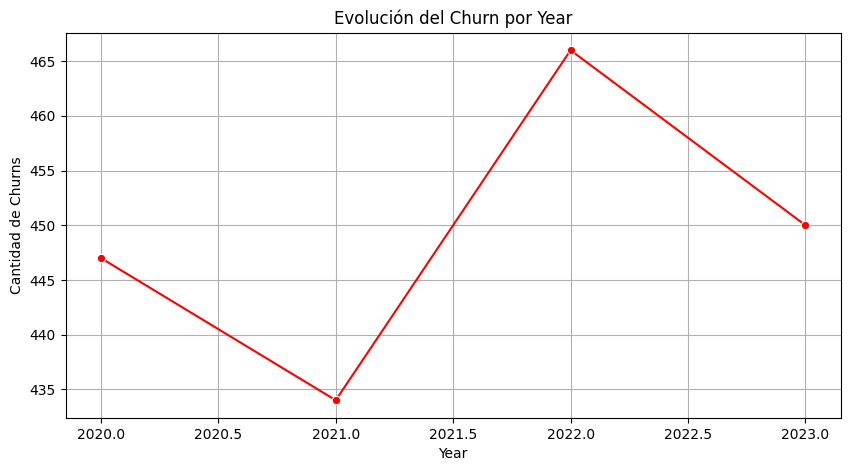

In [7]:
sp.plot_churn_tendencia(df, unidad_tiempo='year') # Graficar el análisis de la tasa de abandono por unidad de tiempo

In [8]:
df.to_excel("../data/datos_churn_limpios.xlsx", index=False)

## Conclusiones del análisis de variables categóricas y temporales  

Hemos explorado en profundidad las **columnas categóricas y temporales**, extrayendo los **insights más relevantes** para comprender los factores que influyen en la tasa de abandono. Con estos análisis, identificamos patrones clave que pueden ayudar a **anticipar y reducir el abandono**, alineándonos con el objetivo del estudio.  


### Plan de datos ilimitado:  
Los clientes con o sin plan de datos ilimitado muestran tasas de abandono elevadas, lo que sugiere que el servicio no está cumpliendo con sus expectativas. Esto podría indicar que el plan no es percibido como un beneficio real o que los clientes encuentran opciones más atractivas en la competencia.  

### Descuento aplicado:  
El hecho de que un cliente haya recibido un descuento no parece ser un factor clave para reducir el abandono. **Posible impacto:** Se podría estar perdiendo dinero en descuentos que no influyen en la fidelización del cliente. Es recomendable evaluar su efectividad o redirigir estas estrategias hacia otras iniciativas que generen mayor compromiso con el servicio

### Plan familiar:  
Los clientes con planes familiares tienen una tasa de abandono menor en comparación con los clientes individuales. Esto puede deberse a que los planes familiares fomentan un mayor compromiso y ofrecen mejor relación calidad-precio.  **Recomendación:** Potenciar las cuentas conjuntas con incentivos adicionales para aumentar la retención.  

### Menores de 30 años:  
Los clientes menores de 30 años tienen una mayor fidelidad con el servicio. Esto puede deberse a que la plataforma ofrece contenido o beneficios más atractivos para un público joven, o a que se sienten más cómodos utilizando la tecnología.  

### Clientes mayores de 65 años:  
Los clientes mayores de 65 años abandonan el servicio con más frecuencia. Esto puede estar relacionado con problemas de accesibilidad, falta de contenido relevante o con el hecho de que realizan menos pedidos online, por lo que el servicio les resulta menos útil.  

### Protección de dispositivos y respaldo en la nube:  
Los clientes que pagan por protección de dispositivos y respaldo en la nube tienen menor abandono. Esto indica que los servicios adicionales pueden aumentar la lealtad del cliente, posiblemente porque incrementan la percepción de valor del servicio.  

### Tipo de contrato:  
Los clientes con contratos mensuales abandonan con más frecuencia que aquellos con contratos de mayor duración.  **Recomendación:** Potenciar la venta de contratos de larga duración, ofreciendo descuentos o beneficios adicionales para incentivar la permanencia.  

### Método de pago:  
Los clientes que pagan con tarjeta de débito tienen una mayor tasa de abandono en comparación con los que usan tarjeta de crédito o pagos automáticos. Esto puede deberse a que los pagos manuales requieren más esfuerzo por parte del usuario y pueden interrumpirse con mayor facilidad.  



### Género, Segmento de Cliente, Método de Contacto Preferido:  
No parecen ser factores determinantes en la retención o abandono del servicio.  
